In [ ]:
import helpers as hp
import numpy as np
import matplotlib.pyplot as plt
from svm import compute_margin, plot_data_and_boundary

In [212]:
# Generate Data
training_data = hp.generate_training_data_binary(4)

In [213]:
# Partition data by class

positive_set, negative_set = [], []
for pt in training_data:
    if pt[-1] == 1:
        positive_set.append(pt)
    elif pt[-1] == -1:
        negative_set.append(pt)

positive_set, negative_set = np.array(positive_set), np.array(negative_set)

In [214]:
# Enumerate all possible support-vector sets
support_vectors = []
pairs = []
for pos in positive_set:
    for neg in negative_set:
        pairs.append((pos,neg))

pairs = np.array(pairs)

In [215]:
# Calculate w, b for all pairs
W, B = [], []
for pos, neg in pairs:
    x_pos, x_neg = pos[:-1], neg[:-1]
    d = x_pos - x_neg
    norm_d = np.linalg.norm(d)
    dir_w = d / norm_d

    w = dir_w * 2 / norm_d

    b = 1 - w @ x_pos
    W.append(w)
    B.append(b)
    support_vectors.append((pos, neg))


In [216]:
# Calculate w, b for all triplets
# Two positives one negative

def generate_triplet_parameters(set1, set2, W: list, B: list, support_vectors: list):
    for i in range(len(set1)):
        for j in range(i + 1, len(set1)):
            for k in range(len(set2)):
                x1 = set1[i][:-1]
                x2 = set1[j][:-1]
                x3 = set2[k][:-1]
                A = np.vstack([
                    np.append(x1, 1),
                    np.append(x2, 1),
                    np.append(x3, 1)
                ])
                y = np.array([1, 1, -1])
                try:
                    solution = np.linalg.solve(A, y)
                    w = solution[:2]
                    b = solution[2]
                    W.append(w)
                    B.append(b)
                    support_vectors.append((set1[i], set1[j], set2[k]))
                except np.linalg.LinAlgError:
                    continue

generate_triplet_parameters(positive_set, negative_set, W, B, support_vectors)
generate_triplet_parameters(negative_set, positive_set, W, B, support_vectors)


In [217]:
# Validate each candidate (w, b)

valid_W, valid_B, valid_S = [], [], []
eps = 1e-8
for w, b, s in zip(W, B, support_vectors):
    is_valid = True
    for point in training_data:
        x = point[:-1]
        y = point[-1]
        if y * (w @ x + b) < 1 - eps:
            is_valid = False
            break
    if is_valid:
        valid_W.append(w)
        valid_B.append(b)
        valid_S.append(s)

valid_W = np.array(valid_W)
valid_B = np.array(valid_B)
valid_S = np.array(valid_S)

In [218]:
# Compute margin, keep (w, b) with largest margin

max_margin = 0
min_idx = None
for w, b, s in zip(valid_W, valid_B, valid_S):
    margin = compute_margin(training_data, w, b)
    if margin > max_margin:
        max_margin = margin
        w_db, b_db, S = w, b, s

print(S)

[[-1.  1.  1.]
 [-3. -1.  1.]
 [ 0. -2. -1.]]


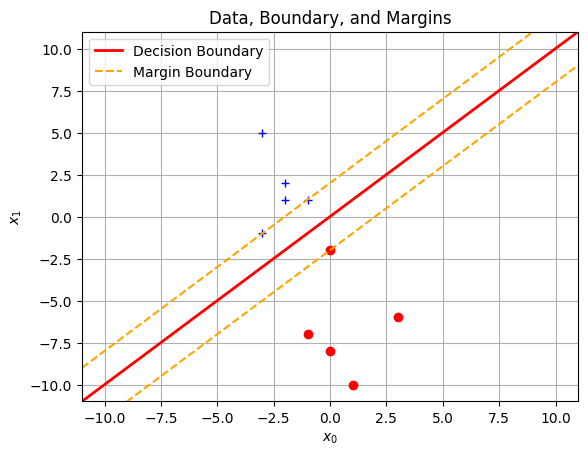

In [219]:
# Plot best decision boundary
plot_data_and_boundary(training_data, w_db, b_db)

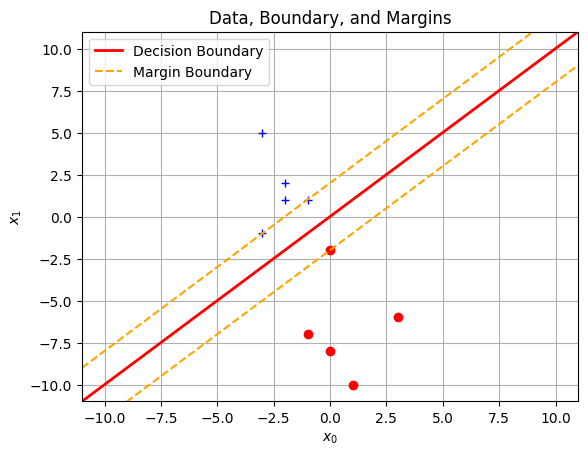

In [220]:
# Plot all decision boundaries

for w, b in zip(valid_W, valid_B):
    plot_data_and_boundary(training_data, w, b)